In [1]:
#Importando as bibliotecas
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [2]:
#Importando o arquivo
data_set='DisneylandReviews.csv'
df=pd.read_csv(data_set,encoding="cp1252")
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [3]:
#Deletando as linhas com valores em branco
data_set='DisneylandReviews.csv'
df=pd.read_csv(data_set,encoding="cp1252",na_values=['missing'])
df=df.dropna().reset_index()
print ("Valores em branco :  ", df.isnull().sum().values.sum())

Valores em branco :   0


In [4]:
#Deletando as linhas duplicadas
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

In [5]:
#Entendendo as colunas do DF
df.describe()

,index,Review_ID,Rating
count,40022.000000,4.002200e+04,40022.000000
mean,20881.434786,3.322066e+08,4.231048
std,12221.117763,1.605467e+08,1.052037
min,0.000000,9.161911e+07,1.000000
25%,10491.250000,1.863461e+08,4.000000
50%,20626.500000,3.076630e+08,5.000000
75%,31721.750000,4.605331e+08,5.000000
max,42117.000000,6.708014e+08,5.000000


In [6]:
df.count()

index                40022
Review_ID            40022
Rating               40022
Year_Month           40022
Reviewer_Location    40022
Review_Text          40022
Branch               40022
dtype: int64

In [7]:
#Descobrindo qual é a representativadede da minha base entre as variáveis
print(df['Branch'].value_counts())
print(df['Rating'].value_counts())

Branch
Disneyland_California    18196
Disneyland_Paris         12691
Disneyland_HongKong       9135
Name: count, dtype: int64
Rating
5    21897
4    10079
3     4780
2     1928
1     1338
Name: count, dtype: int64


In [8]:
#Vamos agora montar a análise de sentimentos
df2 = df
df2['review length']=df2['Review_Text'].apply(lambda x:len(x))

#==
features = df2['Review_Text'].values
#=== 
processed_features = []

for sentence in range(0, len(features)):
    # Removendo todos os caracteres de site
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Removendo caracteres especiais
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Removendo todos os caracteres únicos
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Removendo todos os caracteres do início
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituindo espaços multiplos
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removendo outros caracteres especiais
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convertendo o texto para caixa baixa
    processed_feature = processed_feature.lower()

    # Removendo todos os termos comuns não relevantes
    palavras_irrelevantes = '|'.join({'disneyland', 'disney', 'land', 'ride', 'park', 'day'})
    processed_feature = re.sub(palavras_irrelevantes, '', processed_feature)

    processed_features.append(processed_feature)
#=== 
df3=pd.DataFrame()
df3['reviews']=processed_features
#=======
from textblob import TextBlob
#from wordcloud import WordCloud
# Criando função para chegar na subjetividade
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Criando a função para conseguir a polaridade
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Criando duas novas colunas para conseguirmos a polaridade e subjetividade
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)

#Atribuindo scores para os sentimentos
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score > 0:
  return 'Positive'
 else:
  return 'Neutral'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,reviews,Subjectivity,Polarity,Analysis
0,if you ve ever been to anywhere you ll find ...,0.561481,0.239352,Positive
1,its been while since last time we visit hk ye...,0.459783,0.205797,Positive
2,thanks god it wasn too hot or too humid when w...,0.434857,0.119238,Positive
3,hk is great compact unfortunately there is q...,0.512143,0.189286,Positive
4,the location is not in the city took around 1 ...,0.437500,0.266667,Positive
...,...,...,...,...
40017,although our pick up was prompt the taxi drive...,0.470556,0.034402,Positive
40018,just returned from 4 days family trip to with...,0.437991,0.202937,Positive
40019,we spent the 20 dec 2010 in the and by lunch...,0.493521,0.020628,Positive
40020,well was really looking forward to this trip o...,0.497893,0.125890,Positive


In [9]:
#Juntando o resultado com o DataFrame original
resultado = df
resultado['Sentiment'] = df3['Analysis']
resultado['Nota'] = resultado['Rating'].apply(lambda x:'Negative' if x<4 else 'Positive')

resultado['Reviews_Text']=df3['reviews']
resultado.drop(['Review_Text', 'Review_ID'],axis=1,inplace=True)

In [10]:
df_copy=resultado.copy()
resultado.head()

,index,Rating,Year_Month,Reviewer_Location,Branch,review length,Sentiment,Nota,Reviews_Text
0,0,4,2019-4,Australia,Disneyland_HongKong,329,Positive,Positive,if you ve ever been to anywhere you ll find ...
1,1,4,2019-5,Philippines,Disneyland_HongKong,970,Positive,Positive,its been while since last time we visit hk ye...
2,2,4,2019-4,United Arab Emirates,Disneyland_HongKong,938,Positive,Positive,thanks god it wasn too hot or too humid when w...
3,3,4,2019-4,Australia,Disneyland_HongKong,485,Positive,Positive,hk is great compact unfortunately there is q...
4,4,4,2019-4,United Kingdom,Disneyland_HongKong,163,Positive,Positive,the location is not in the city took around 1 ...


Text(0.5, 1.0, 'Previsto')

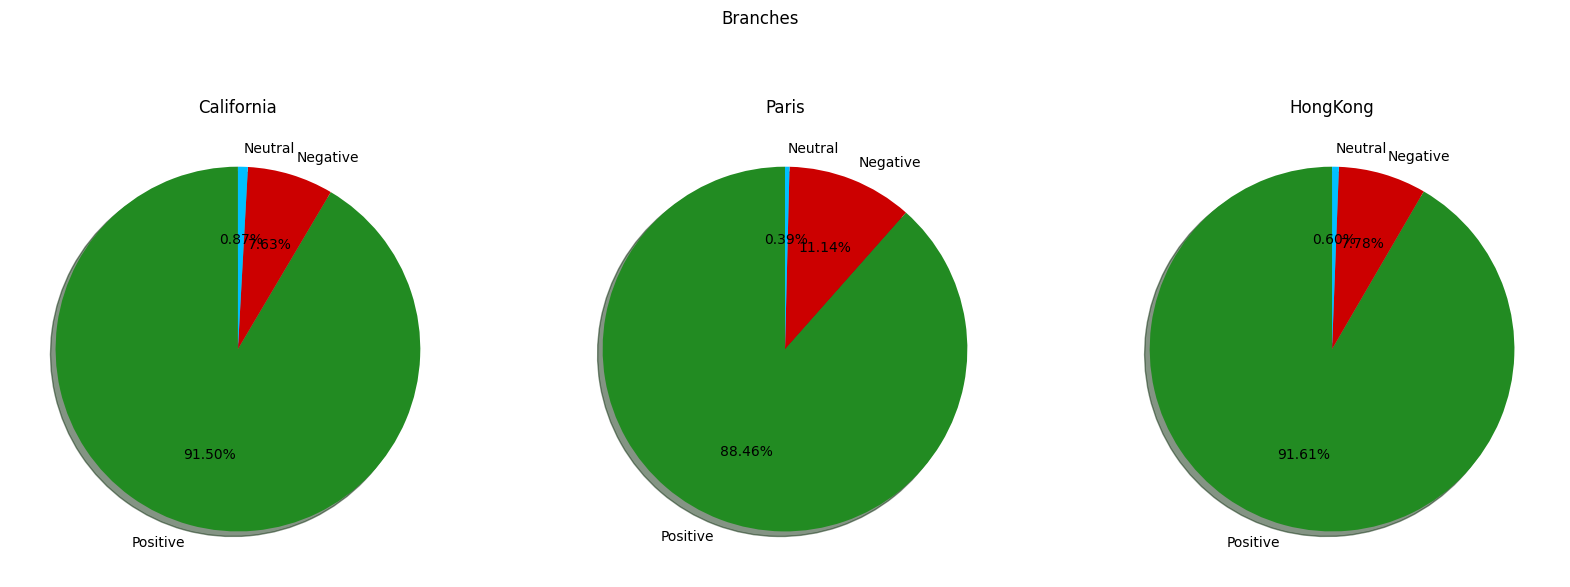

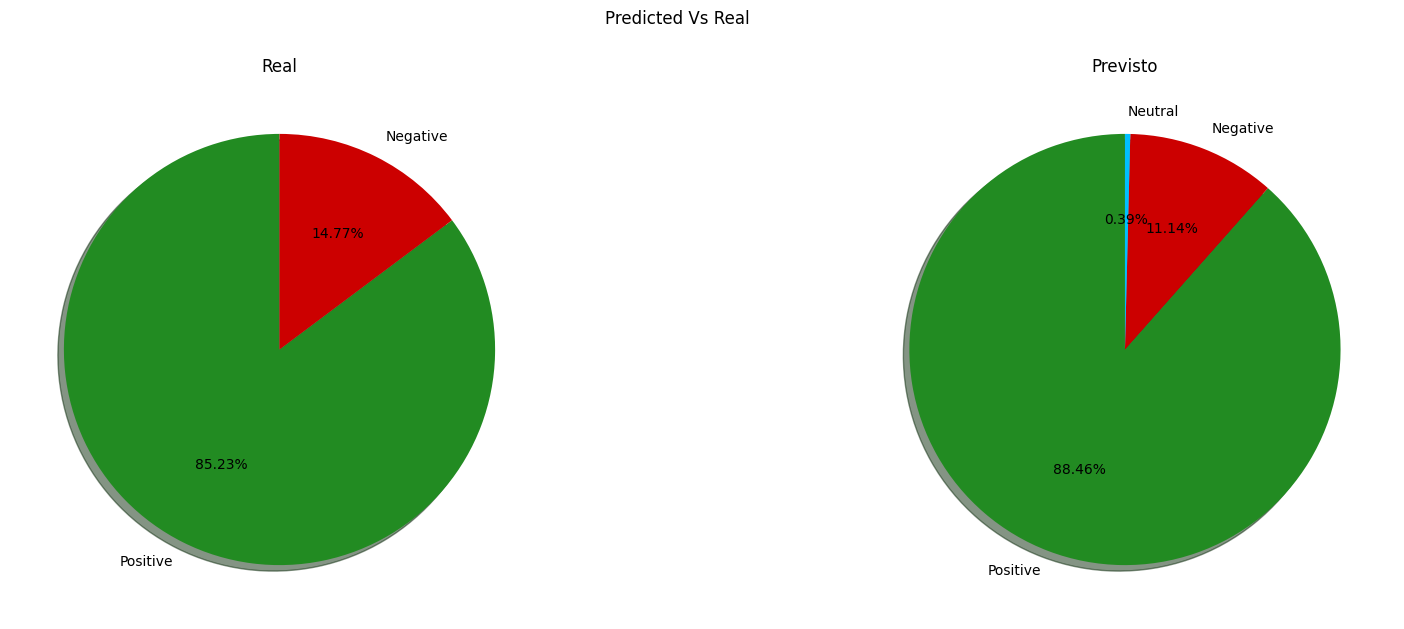

In [11]:
#Fazendo um gráficos de pizza para entender a proporção dos resultados entre as variáveis

california=resultado.loc[resultado['Branch']=='Disneyland_California']
paris=resultado.loc[resultado['Branch']=='Disneyland_Paris']
hong_kong=resultado.loc[resultado['Branch']=='Disneyland_HongKong']


label_cal=california['Sentiment'].value_counts(sort = True).index
size_cal=california['Sentiment'].value_counts(sort = True)

label_par=paris['Sentiment'].value_counts(sort = True).index
size_par=paris['Sentiment'].value_counts(sort = True)

label_hon=hong_kong['Sentiment'].value_counts(sort = True).index
size_hon=hong_kong['Sentiment'].value_counts(sort = True)


real=resultado.loc[resultado['Branch']=='Disneyland_California']
previsto=resultado.loc[resultado['Branch']=='Disneyland_Paris']


label_real=real['Nota'].value_counts(sort = False).index
size_real=real['Nota'].value_counts(sort = False)

label_prev=previsto['Sentiment'].value_counts(sort = False).index
size_prev=previsto['Sentiment'].value_counts(sort = False)


fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
fig.suptitle('Branches')
axes[0].pie(size_cal,labels=label_cal,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF'])
axes[0].set_title('California')
axes[1].pie(size_par,labels=label_par,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF'])
axes[1].set_title('Paris')
axes[2].pie(size_hon,labels=label_hon,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF'])
axes[2].set_title('HongKong')

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)
fig.suptitle('Predicted Vs Real')
axes[0].pie(size_real,labels=label_real,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF'])
axes[0].set_title('Real')
axes[1].pie(size_prev,labels=label_prev,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF'])
axes[1].set_title('Previsto')

<h1>Nuvem de palavras</h1>

In [20]:
resultado['Reviews_Text']=resultado['Reviews_Text'].astype('str')
review_text = " ".join(i for i in df['Reviews_Text'])

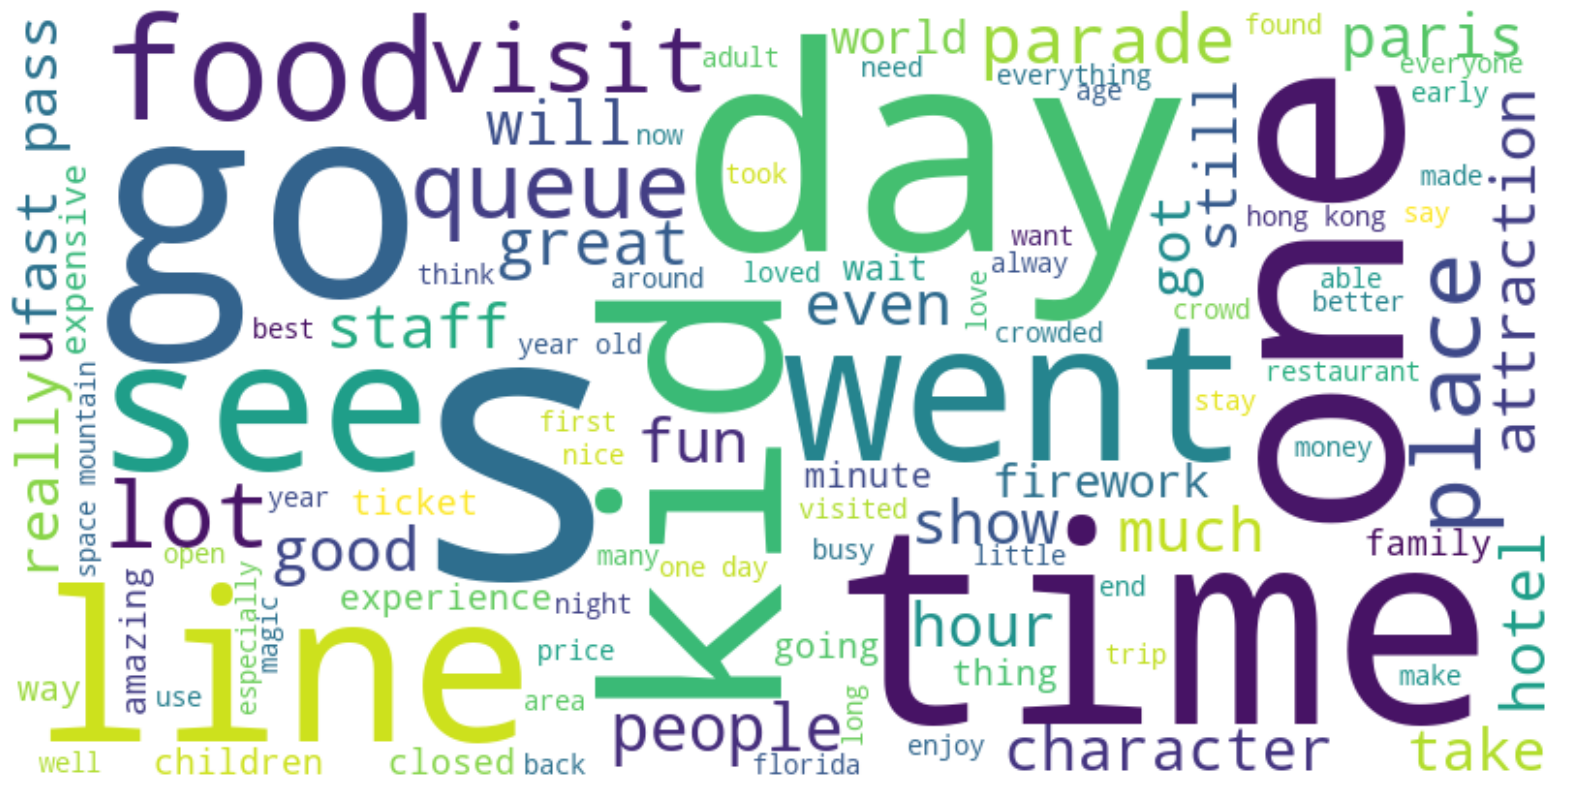

In [21]:
# todas as avaliações
wc = WordCloud(width=800, height=400, max_font_size=200, max_words=100, background_color="white").generate(review_text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

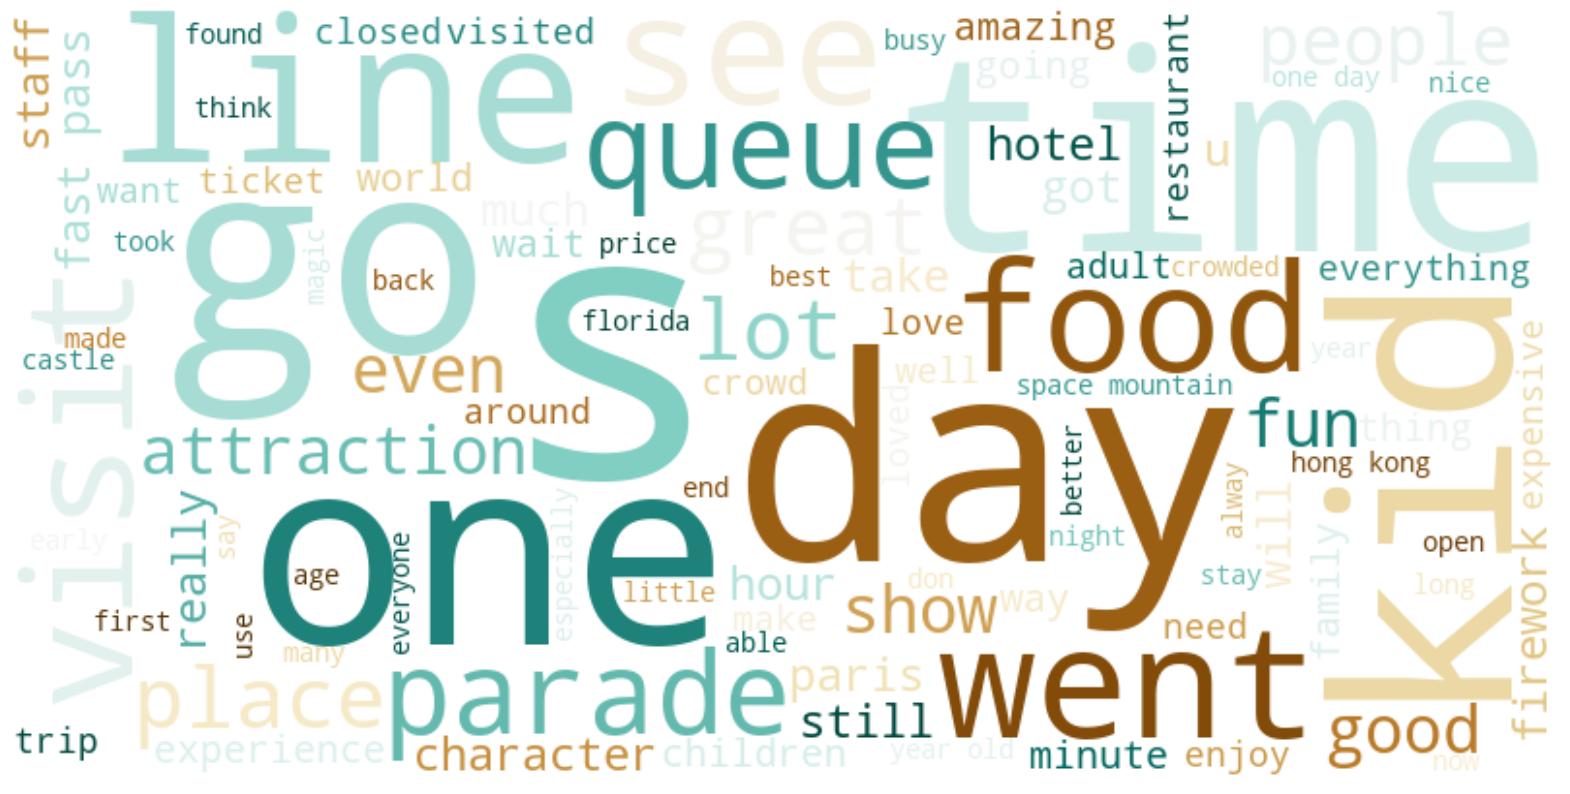

In [22]:
# avaliações positivas
positif = resultado.loc[resultado['Sentiment'] == "Positive"]
review_text = " ".join(i for i in positif['Reviews_Text'])
wc = WordCloud(width=800, height=400, max_font_size=200, max_words=100, background_color="white", colormap='BrBG', ).generate(review_text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

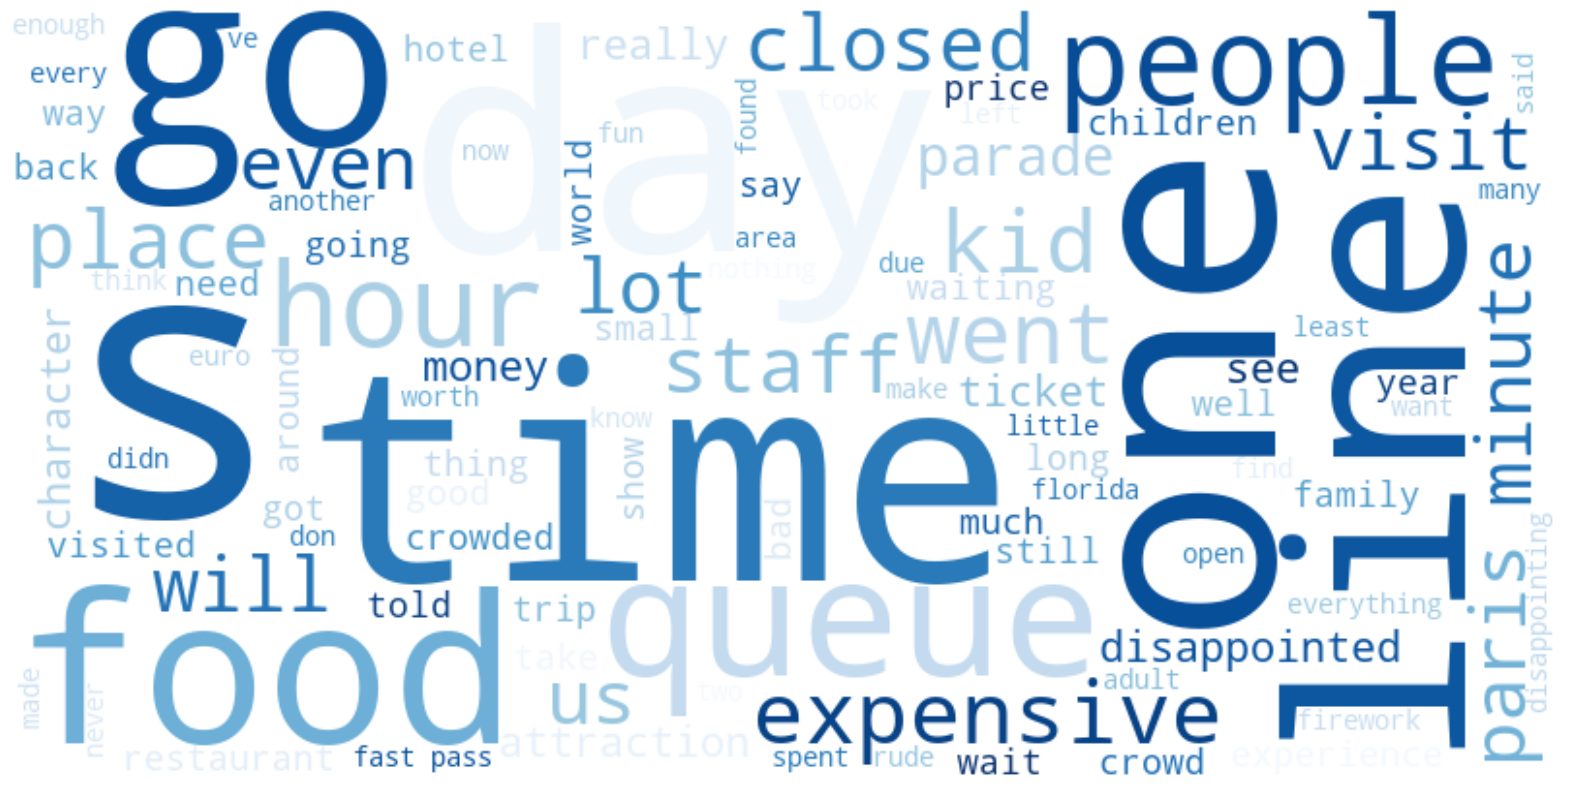

In [23]:
# avaliações negativas
negatif = resultado.loc[resultado['Sentiment'] == "Negative"]
review_text = " ".join(i for i in negatif['Reviews_Text'])
wc = WordCloud(width=800, height=400, max_font_size=200, max_words=100, background_color="white", colormap='Blues', ).generate(review_text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()